<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/EM_InducedTransparency2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

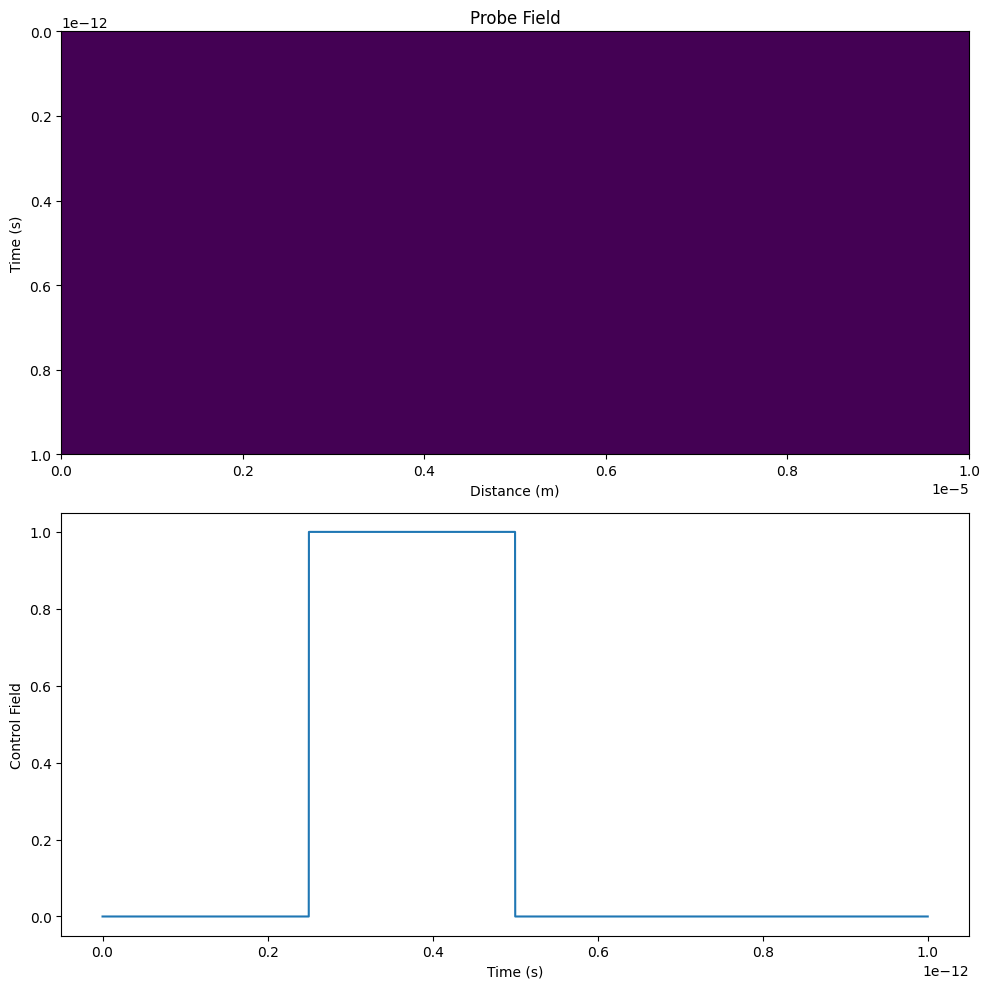

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
c = 3e8  # Speed of light [m/s]
n = 1.5  # Refractive index
epsilon_0 = 8.854e-12  # Vacuum permittivity [F/m]

# Geometry
z_max = 1e-5  # Maximum z coordinate [m]
t_max = 1e-12  # Maximum time [s]
dz = 1e-8  # Spatial step size [m]
dt = 1e-16  # Time step size [s]
z_steps = int(z_max / dz) + 1  # Number of spatial steps
t_steps = int(t_max / dt) + 1  # Number of time steps
z = np.linspace(0, z_max, z_steps)  # Spatial coordinates
t = np.linspace(0, t_max, t_steps)  # Time coordinates

# Initialize electric field and polarization density
E_p = np.zeros((z_steps, t_steps))
P = np.zeros((z_steps, t_steps))

# Define Gaussian probe field (E_p)
probe_width = t_max / 4  #4
t0 = t_max / 2   #2
E_p[0, :] = np.exp(-(t - t0)**2 / (2 * probe_width**2))

# Define control field (E_c)
E_c = np.zeros(t_steps)
E_c[int(t_steps/4):int(t_steps/2)] = 1

# FDTD loop
for i in range(1, t_steps - 1):
    # Update probe field E_p
    E_p[1:-1, i+1] = E_p[1:-1, i] - dt * (P[1:-1, i] - P[:-2, i]) / (dz * epsilon_0) \
                     - (c * dt / dz) * (E_p[2:, i] - E_p[1:-1, i])

    # Update polarization density P
    P[1:-1, i+1] = P[1:-1, i] + dt * n**2 * epsilon_0 * (E_p[2:, i] - E_p[1:-1, i]) / dz \
                   + dt * n**2 * epsilon_0 * E_c[i] * (E_p[2:, i] - E_p[1:-1, i]) / dz

# Plot results
plt.figure(figsize=(10,10))

plt.subplot(2, 1, 1)
plt.imshow(np.abs(E_p)**2, extent=[0, z_max, t_max, 0], aspect='auto')
plt.xlabel('Distance (m)')
plt.ylabel('Time (s)')
plt.title('Probe Field')

plt.subplot(2, 1, 2)
plt.plot(t, E_c)
plt.xlabel('Time (s)')
plt.ylabel('Control Field')

plt.tight_layout()
plt.show()
